In [25]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from scipy import special as spec
%matplotlib inline

In [43]:
class neuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        self.lr = learning_rate
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.activation_function = lambda x: spec.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        targets = np.array(targets_list, ndmin = 2).T
        inputs = np.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin = 2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [44]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [45]:
n.query([1.0,0.5,-1.5])

array([[0.56648051],
       [0.58902856],
       [0.46373267]])

In [46]:
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

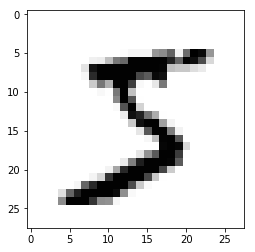

In [47]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation = 'None')

In [48]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(scaled_input)

In [49]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [50]:
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


In [51]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    #print(len(targets))
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [52]:
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [70]:
all_values = test_data_list[3].split(',')
print(all_values[0])

0


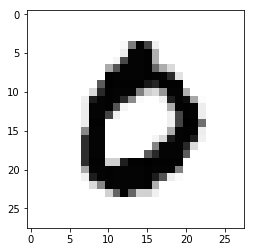

In [71]:
image_array = np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [72]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.56762707],
       [0.00580625],
       [0.04945181],
       [0.01874682],
       [0.0272676 ],
       [0.00902742],
       [0.03960948],
       [0.47195398],
       [0.01224187],
       [0.00182791]])